In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
import shared_functions_setup as setup

In [2]:
survey='LSST_DESI'

if (survey == 'SDSS'):
    import params as pa
elif (survey == 'LSST_DESI'):
    import params_LSST_DESI as pa
else:
    print "We don't have support for that survey yet; exiting."
    exit()

In [3]:
(z, dNdz_raw) = setup.get_NofZ_unnormed(pa.dNdzpar_fid, pa.dNdztype, pa.zsmin, pa.zsmax, 100, survey)
norm = scipy.integrate.simps(dNdz_raw, z)

dNdz = dNdz_raw / norm

dNdz_Chang_raw = z**pa.alpha_fid * np.exp( - (z / pa.z0_fid)**pa.beta_fid)
norm_Chang = scipy.integrate.simps(dNdz_Chang_raw, z)
dNdz_Chang = dNdz_Chang_raw / norm_Chang

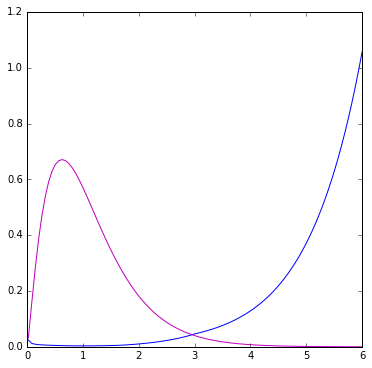

In [4]:
plt.figure(figsize=[6,6])
plt.plot(z, dNdz, 'b')
plt.hold(True)
plt.plot(z, dNdz_Chang, 'm')
plt.show()